#  Customer Segmentation Using Unsupervised Learning
## Step 1: Problem Statement and Objective

## Problem Statement

In the modern retail industry, understanding customer behavior is key to improving customer satisfaction, increasing sales, and designing targeted marketing strategies. Mall management or marketers often have access to data about customers' age, gender, income, and spending habits.

However, without labeled data, it's difficult to categorize customers. This is where **unsupervised learning**, especially **clustering**, becomes useful. By identifying patterns in customer behavior, businesses can create better-targeted offers and experiences.

## Objective

The main objective of this project is to:

- Perform **Customer Segmentation** using **K-Means Clustering**.
- Use customer data (Annual Income, Spending Score, etc.) to group similar customers into distinct clusters.
- **Visualize** these clusters using **PCA** (Principal Component Analysis) or **t-SNE** (t-Distributed Stochastic Neighbor Embedding).
- Provide **actionable marketing strategies** for each identified segment based on their spending behavior.

## Why This Matters

- Personalized marketing increases customer retention.
- Helps businesses allocate budgets effectively.
- Improves product recommendation systems.
- Enables better customer experience and satisfaction.

This project demonstrates how machine learning (without labeled outputs) can lead to **real business impact** through **data-driven decision making**.


# Step 2: Dataset Description and Loading

## Dataset Description

This dataset contains customer information collected by a mall for the purpose of customer segmentation. Each row represents a unique customer, and the columns include:

| Column Name              | Description                                                  |
|--------------------------|--------------------------------------------------------------|
| `CustomerID`             | Unique identifier for each customer                          |
| `Genre` (or Gender)      | Gender of the customer (Male/Female)                         |
| `Age`                    | Age of the customer                                          |
| `Annual Income (k$)`     | Annual income in thousands of dollars                        |
| `Spending Score (1-100)` | Score assigned based on spending behavior and purchasing power |

The goal is to use this information to segment customers based on their **Annual Income** and **Spending Score**.


## Dataset Loading and Preview



### Import necessary libraries

In [1]:
import pandas as pd   # For data handling
import numpy as np    # For numerical operations

## Load the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

### Preview the first 5 rows

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Check the shape of the dataset

In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (200, 5)


### View column names and data types, and check for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###  Display basic statistics to understand value ranges

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Summary

- The dataset was successfully loaded from `Mall_Customers.csv`.
- It contains **200 entries** and **5 columns**.
- There are **no missing values** in any column.
- The dataset includes customer demographics (`CustomerID`, `Gender`, `Age`) and behavioral features (`Annual Income`, `Spending Score`).
- Column data types are appropriate: integers for numerical data and object for categorical data.
- The two most important features for clustering will be:
  - `Annual Income`
  - `Spending Score`
- The dataset is now ready for the next step: **data cleaning and preprocessing**.


### Optional: Rename columns for ease of access

In [7]:
df.rename(columns={
    'Genre': 'Gender',
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

# Step 3: Data Cleaning and Preprocessing

Before building our clustering model, we need to prepare the dataset:

### Key Preprocessing Tasks:
1. **Drop unnecessary columns** like `CustomerID` (not useful for clustering).
2. **Encode categorical variables**, e.g., convert `Gender` into numeric format.
3. **Select features** relevant for clustering (`Annual Income` and `Spending Score`).
4. **(Optional)** Normalize or scale the data (helps clustering algorithms like K-Means).


### Drop 'CustomerID' as it's just an identifier

In [8]:
df_clean = df.drop('CustomerID', axis=1)

### Encode the 'Genre' column: Male → 1, Female → 0

In [9]:
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female': 0})

### Confirm encoding and structure

In [10]:
df_clean.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Select features for clustering
#### We'll use Annual_Income and Spending_Score for simplicity

In [11]:
X = df_clean[['Annual_Income', 'Spending_Score']]

### Optional: Feature Scaling using StandardScaler (recommended)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Summary

- Removed `CustomerID` since it doesn’t provide clustering value.
- Encoded `Genre` as numeric (Male = 1, Female = 0).
- Selected `Annual_Income` and `Spending_Score` as main features for clustering.
- Applied **feature scaling** using `StandardScaler` to normalize the data, which improves clustering performance.

The dataset is now cleaned and ready for **K-Means clustering** in the next step.


# Step 4: Exploratory Data Analysis (EDA)

In this step, we'll use visualizations to understand customer behavior patterns and feature distributions.

### Goals of EDA:
- Explore age distribution of customers
- Compare income and spending across genders
- Understand relationships between `Annual Income` and `Spending Score`
- Look for natural groupings (clusters) before applying ML

### Import visualization libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style='whitegrid')

## 1. Age Distribution

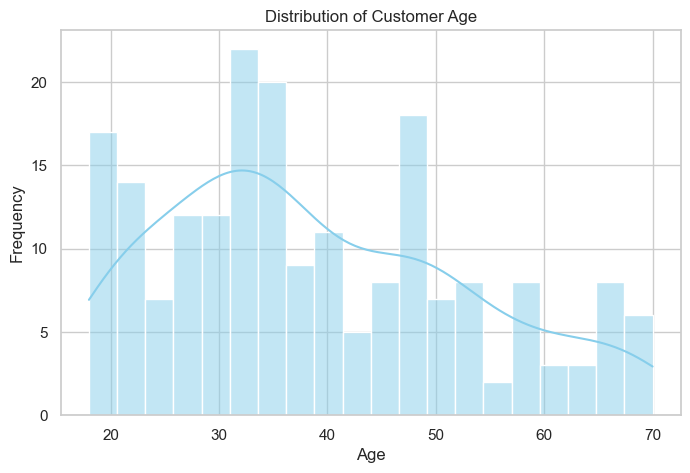

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##  2. Gender Count

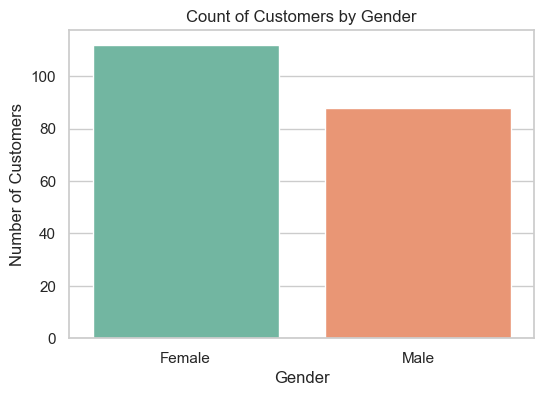

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Count of Customers by Gender')
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('Number of Customers')
plt.show()

##  3. Annual Income Distribution

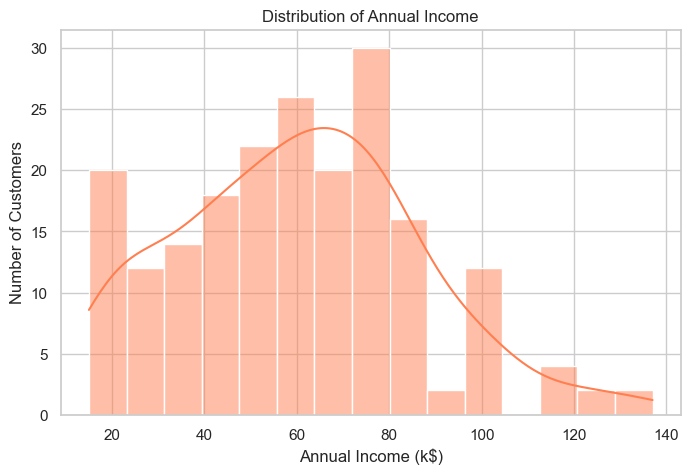

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Annual_Income'], kde=True, bins=15, color='coral')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

## 4. Spending Score Distribution

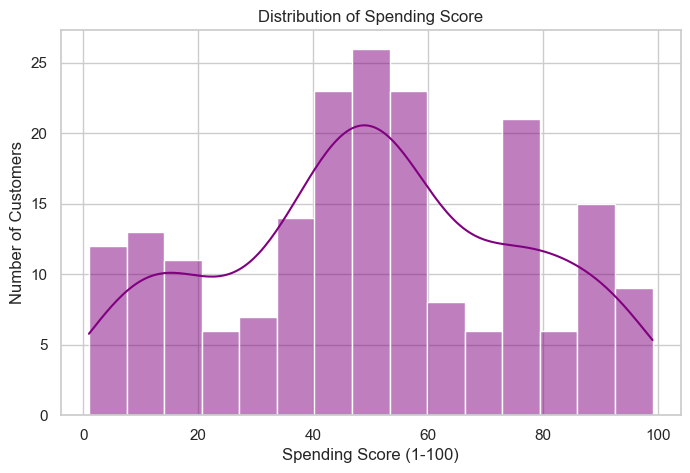

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Spending_Score'], kde=True, bins=15, color='purple')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()

##  5. Annual Income vs. Spending Score

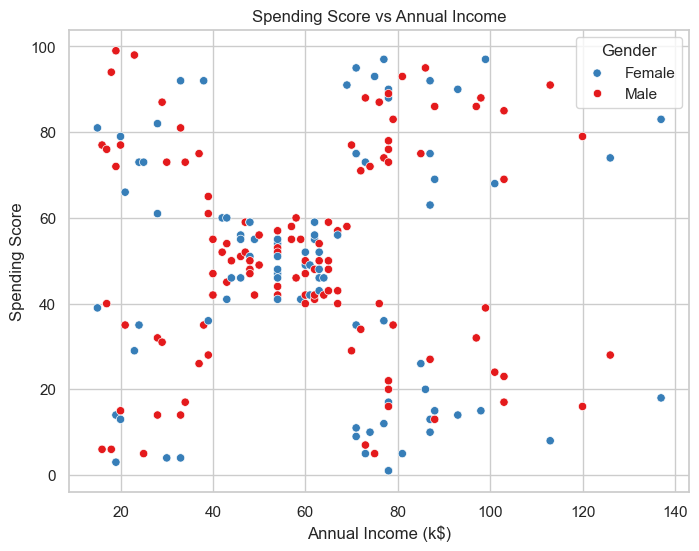

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df_clean, hue='Gender', palette='Set1')
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

##  Summary of Insights

- **Age** distribution is slightly right-skewed, with many customers between 20–40 years old.
- **Gender** distribution is slightly more Female than Male.
- **Annual Income** is mostly between \$15k and \$70k, centered around \$60k.
- **Spending Score** shows a wide spread; some low-income customers have very high spending.
- The **scatter plot** shows a natural grouping in income vs. spending — a good sign for applying clustering.




# Step 5: Model Building and Evaluation (K-Means Clustering)

In this step, we'll use the **K-Means algorithm** to segment customers into clusters based on:

- `Annual_Income`
- `Spending_Score`

###  Goals:
- Use the **Elbow Method** to find the optimal number of clusters (k)
- Train the **K-Means model**
- Assign cluster labels to customers
- Evaluate clustering performance using **Silhouette Score**


##  Import required libraries

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

##  Step 1: Use Elbow Method to find optimal k

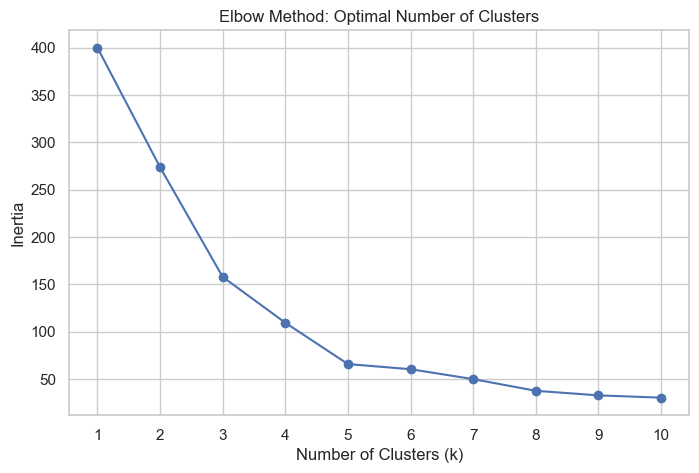

In [21]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to determine optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.show()

## Observation:
The "elbow" in the curve shows where adding more clusters doesn't reduce inertia much.  
This point is considered the optimal value for `k`.  
Let’s assume the elbow appears at **k = 5**.


##  Step 2: Apply K-Means with optimal number of clusters (k=5)

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#  Add cluster labels to original DataFrame
df_clean['Cluster'] = clusters

## Step 3: Evaluate using Silhouette Score

In [23]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 3))

Silhouette Score: 0.555


###  Summary of Clustering

- **K-Means** clustering was successfully applied with **k = 5** clusters.
- Customers were segmented based on **Annual Income** and **Spending Score**.
- A new column `Cluster` was added to the dataset to indicate each customer's group.
- The model's performance was evaluated using the **Silhouette Score**, which measures how well-separated the clusters are.
- **Silhouette Score:** `0.555`  
  This is a moderately good score, suggesting that the clusters are reasonably well-defined.

We are now ready to **visualize these clusters** using **PCA or t-SNE** in the next step.

# Step 6: Cluster Visualization using PCA

After clustering, it's useful to visualize customer segments in 2D space.  
We'll apply **Principal Component Analysis (PCA)** to reduce the data from 2D to 2 principal components for visualization.


###  Import PCA

In [24]:
from sklearn.decomposition import PCA

###  Apply PCA

In [25]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

###  Add PCA components to the DataFrame

In [26]:
df_clean['PCA1'] = components[:, 0]
df_clean['PCA2'] = components[:, 1]

## Visualize the clusters in PCA-reduced space

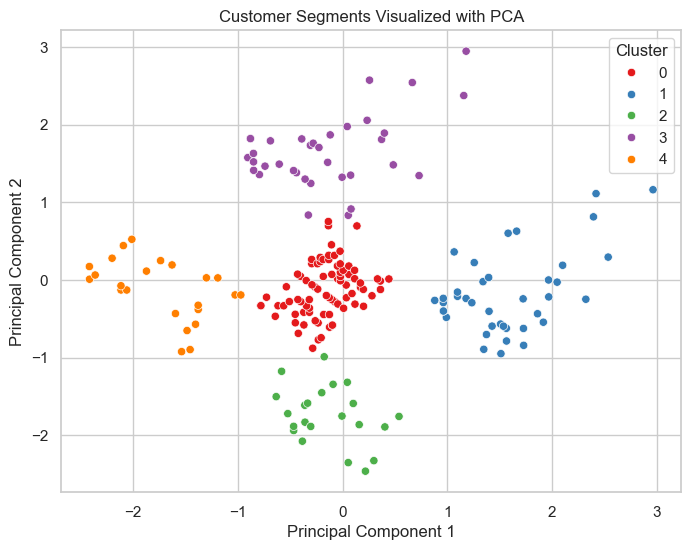

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df_clean,
    legend='full'
)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Insights from PCA Visualization

- Each colored cluster represents a customer group discovered by K-Means.
- The PCA projection helps us understand how well the clusters are separated in a 2D view.
- Some overlap is natural in dimensionality reduction, but the overall grouping looks visually meaningful.


#  Step 6 (Alternative): Cluster Visualization using t-SNE

In this step, we'll use **t-SNE** (t-distributed Stochastic Neighbor Embedding) to visualize customer clusters in 2D space.

Unlike PCA, which uses linear projections, **t-SNE is a non-linear dimensionality reduction technique** that better preserves the local structure of the data — making it ideal for visualizing clusters.

> ⚠️ Note: t-SNE is computationally more intensive and can give slightly different results every time due to randomness. We set a fixed `random_state` for reproducibility.


###  Import t-SNE

In [28]:
from sklearn.manifold import TSNE

### Apply t-SNE with correct parameters

In [29]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

# Fit and transform scaled data
tsne_components = tsne.fit_transform(X_scaled)

###  Add t-SNE results to DataFrame

In [30]:
df_clean['TSNE1'] = tsne_components[:, 0]
df_clean['TSNE2'] = tsne_components[:, 1]

###  Visualize the clusters using t-SNE components

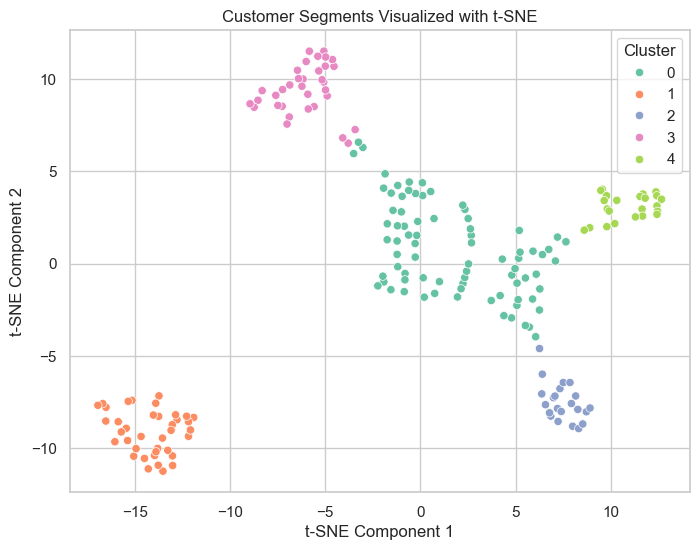

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='Set2',
    data=df_clean,
    legend='full'
)
plt.title('Customer Segments Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

## Insights from t-SNE Visualization

- Each color-coded cluster represents a group of customers identified by the K-Means algorithm.
- t-SNE reveals **non-linear relationships and separation** between customer segments.
- Compared to PCA, t-SNE may show **tighter or more distinct clusters**.
- This visualization supports the validity of our clustering model.

We are now ready for the final step: drawing conclusions and developing **targeted marketing strategies** for each segment.


#  Step 7: Final Conclusion and Marketing Strategies

Based on the K-Means clustering of customers using their **Annual Income** and **Spending Score**, we identified 5 distinct segments.

Below is a summary of each cluster along with **suggested marketing strategies** tailored to their behavior:

---

## Cluster 0: High Income, High Spending
**Insight:** These are your premium customers who are financially strong and love to spend.
**Strategy:**
- Create VIP loyalty programs.
- Offer premium and exclusive services (e.g., personal shoppers, priority services).
- Introduce early access to new products or collections.
- Provide customized recommendations based on past purchases.

## Cluster 1: Low Income, High Spending
**Insight:** These are impulsive or trend-driven buyers despite limited income.
**Strategy:**
- Promote Buy Now, Pay Later (BNPL) options or EMIs.
- Offer flash sales, combo deals, and discount coupons.
- Use influencer marketing and social proof to retain interest.
- Run student discount programs or gamified loyalty systems.

## Cluster 2: Average Income, Average Spending
**Insight:** These are your steady and reliable customers, middle-of-the-road in both income and spend.
**Strategy:**
- Offer value-for-money packages and bundled offers.
- Encourage them with seasonal discounts and loyalty points.
- Use email marketing with curated product lists.
- Keep them engaged through regular touchpoints (e.g., app notifications, newsletters).

## Cluster 3: High Income, Low Spending
**Insight:** These are wealthy but cautious buyers — possibly selective or value-driven.
**Strategy:**
- Focus on trust-building with high-quality, eco-friendly, or durable products.
- Emphasize premium experiences rather than volume deals.
- Offer luxury items with long-term value (e.g., investment items).
- Use understated branding (less aggressive, more elegant).

## Cluster 4: Low Income, Low Spending
**Insight:** These are price-sensitive or budget-constrained shoppers.
**Strategy:**
- Offer basic packages, low-cost items, and student deals.
- Promote cashback offers, referral bonuses, and social media contests.
- Use community engagement marketing (e.g., relatable ads, neighborhood campaigns).
- Focus on cost-effectiveness and value.
  
---

##  Final Takeaways
This segmentation allows the mall or retailer to focus on the right customer, with the right message, at the right time, rather than treating all customers the same. It maximizes ROI on marketing, improves customer satisfaction, and supports smart, data-driven business growth.


## If you want to visualize these segments in a summary table

In [32]:
import pandas as pd

cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4],
    'Income Level': ['High', 'Low', 'Medium', 'High', 'Low'],
    'Spending Score': ['High', 'High', 'Medium', 'Low', 'Low'],
    'Customer Profile': [
        'Affluent and highly engaged',
        'Budget-limited but active shoppers',
        'Balanced income and spending',
        'Wealthy but conservative spenders',
        'Budget-conscious and cautious'
    ],
    'Marketing Strategy': [
        'VIP programs, luxury product offers, early access to new launches',
        'Flash sales, influencer marketing, installment plans',
        'Loyalty points, value bundles, seasonal offers',
        'Emphasize quality/durability, subtle luxury branding',
        'Affordable packs, referral programs, cashback deals'
    ]
})

cluster_summary

,Cluster,Income Level,Spending Score,Customer Profile,Marketing Strategy
0,0,High,High,Affluent and highly engaged,"VIP programs, luxury product offers, early acc..."
1,1,Low,High,Budget-limited but active shoppers,"Flash sales, influencer marketing, installment..."
2,2,Medium,Medium,Balanced income and spending,"Loyalty points, value bundles, seasonal offers"
3,3,High,Low,Wealthy but conservative spenders,"Emphasize quality/durability, subtle luxury br..."
4,4,Low,Low,Budget-conscious and cautious,"Affordable packs, referral programs, cashback ..."


#  Final Conclusion with Insights

In this project, we wanted to understand the different types of customers who visit a shopping mall.

To do this, we used a method called **K-Means Clustering** to group the customers into **5 segments** based on how much money they earn and how much they spend.

Each group had customers with similar behaviors. For example:
- Some spent a lot and earned a lot
- Some had low income but still spent a lot
- Some were very budget-conscious

We then used **PCA** and **t-SNE** to create simple graphs that helped us **see these groups clearly**. These visualizations made it easy to understand how different the customer types are from one another.

###  Key Insights:
- There are clearly different types of shoppers at the mall — not everyone spends the same.
- Some customers are worth targeting with luxury or VIP offers.
- Others respond better to discounts, bundles, or simple deals.
- By knowing these customer groups, the mall can **plan smarter marketing strategies** for each type — improving customer satisfaction and increasing sales.

This project shows how data can help businesses make better decisions based on real customer behavior.
